## School project - 5MLDE
The following notebook has been created for a school project model deployment. The subject and the questions are available in the appendix.

The group members who participated in this project are:
- AMIMI Lamine
- BEZIN Théo
- LECOMTE Alexis
- PAWLOWSKI Maxence

### Main index
1. **Data analysis (you are here)**
2. Data quality tests
3. _Appendix_

# 1 - Data analysis
The purpose of this first notebook will be to analyze the data in the dataset and draw distribution graphs.

### Index
<ol type="A">
  <li>The dataset</li>
  <li>Notebook initialization</li>
  <li>Data exploration</li>
  <li>Conclusion of the data analysis</li>
</ol>

## A - The dataset
This project will use the Android Malware dataset. As stated on the [dataset page](https://www.kaggle.com/datasets/subhajournal/android-malware-detection), it contains 355,630 rows. Each row contains data about an application.

## B - Notebook initialization
The following code blocks will be replicated in the next notebooks. Their main purpose is to import the necessary packages, initialize some of them and define a bunch of constants and utility functions used in the project. A small explanation will be added to each block of code, but will then be omitted to avoid repetition.

### B.1 - Imports
Here we import all used packages. This prevents some imports from being hidden in another piece of code and ensures that nothing is imported twice.

In [1]:
# OS and filesystem
from pathlib import Path

# Data
import pandas
from ydata_profiling import ProfileReport
from matplotlib import pyplot
import matplotx

# Console output
from colorama import Fore, Style

### B.2 - Package initialization
We define the style of the graphs generated by the `matplotlib` package to facilitate quick identification of trends and patterns in the data and to effectively communicate the results.

In [2]:
pyplot.rcParams.update(pyplot.rcParamsDefault)
pyplot.style.use(matplotx.styles.dracula)  # Set the matplotlib style

### B.3 - Constants
We also define some constants used in this notebook. If you clone this project, be careful when changing these constants and remember to apply the changes in all notebooks. You may notice that we have defined a random state. Although it is never used for final models, it is useful when we try to compare the performance of different models on the same dataset.

In [3]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
CONFIG_FOLDER = (PARENT_FOLDER / ".." / ".." / "config").resolve()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()
MODELS_FOLDER = (PARENT_FOLDER / ".." / ".." / "models").resolve()
TEMP_FOLDER = (PARENT_FOLDER / ".." / ".." / "temp").resolve()

### B.4 - Dataset loading
We then load the dataset.

In [4]:
data = pandas.read_csv((DATA_FOLDER / "Android_Malware.csv"), index_col=0, delimiter=",", dtype={
    "Flow ID": str,
    "Source IP": str,
    "Source Port": int,
    "Destination IP": str,
    "Destination Port": int,
    "Protocol": float,
    "Timestamp": str,
    "Flow Duration": float,
    "Total Fwd Packets": float,
    "Total Backward Packets": float,
    "Total Length of Fwd Packets": float,
    "Total Length of Bwd Packets": float,
    "Fwd Packet Length Max": float,
    "Fwd Packet Length Min": float,
    "Fwd Packet Length Mean": float,
    "Fwd Packet Length Std": float,
    "Bwd Packet Length Max": float,
    "Bwd Packet Length Min": float,
    "Bwd Packet Length Mean": float,
    "Bwd Packet Length Std": float,
    "Flow Bytes/s": float,
    "Flow Packets/s": float,
    "Flow IAT Mean": float,
    "Flow IAT Std": float,
    "Flow IAT Max": float,
    "Flow IAT Min": float,
    "Fwd IAT Total": float,
    "Fwd IAT Mean": float,
    "Fwd IAT Std": float,
    "Fwd IAT Max": float,
    "Fwd IAT Min": float,
    "Bwd IAT Total": float,
    "Bwd IAT Mean": float,
    "Bwd IAT Std": float,
    "Bwd IAT Max": float,
    "Bwd IAT Min": float,
    "Fwd PSH Flags": float,
    "Bwd PSH Flags": float,
    "Fwd URG Flags": float,
    "Bwd URG Flags": float,
    "Fwd Header Length": float,
    "Bwd Header Length": float,
    "Fwd Packets/s": float,
    "Bwd Packets/s": float,
    "Min Packet Length": float,
    "Max Packet Length": float,
    "Packet Length Mean": float,
    "Packet Length Std": float,
    "Packet Length Variance": float,
    "FIN Flag Count": float,
    "SYN Flag Count": float,
    "RST Flag Count": float,
    "PSH Flag Count": float,
    "ACK Flag Count": float,
    "URG Flag Count": float,
    "CWE Flag Count": "object",  # Change later
    "ECE Flag Count": float,
    "Down/Up Ratio": "object",  # Change later
    "Average Packet Size": float,
    "Avg Fwd Segment Size": float,
    "Avg Bwd Segment Size": float,
    "Fwd Header Length.1": float,
    "Fwd Avg Bytes/Bulk": "object",  # Change later
    "Fwd Avg Packets/Bulk": float,
    "Fwd Avg Bulk Rate": float,
    "Bwd Avg Bytes/Bulk": float,
    "Bwd Avg Packets/Bulk": float,
    "Bwd Avg Bulk Rate": float,
    "Subflow Fwd Packets": float,
    "Subflow Fwd Bytes": float,
    "Subflow Bwd Packets": float,
    "Subflow Bwd Bytes": float,
    "Init_Win_bytes_forward": float,
    "Init_Win_bytes_backward": float,
    "act_data_pkt_fwd": float,
    "min_seg_size_forward": float,
    "Active Mean": float,
    "Active Std": float,
    "Active Max": float,
    "Active Min": float,
    "Idle Mean": float,
    "Idle Std": float,
    "Idle Max": float,
    "Idle Min": float,
    "Label": str
})
data.columns = data.columns.str.strip()
print(f"{data.shape[0]} rows, {data.shape[1]} columns")
data.head(n=5)

C:\Users\alexi\AppData\Local\Temp\ipykernel_8384\120255162.py:1: DtypeWarning: Columns (56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv((DATA_FOLDER / "Android_Malware.csv"), index_col=0, delimiter=",", dtype={


355630 rows, 85 columns


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


## C - Data exploration
### C.1 - Null and empty values
We begin this analysis by checking the rate of missing data in the dataset.

In [5]:
def missing_values(df, df_name: str = None, keep_zeros=True) -> None:
    # Compute the dataset size and the count of missing value
    data_count = df.shape[0] * df.shape[1]
    missing = missing_df = df.isna().sum()

    # Filter out column with zero missing value
    if not keep_zeros:
        missing_df = missing_df[missing_df > 0]

    # Calculate the percent of missing values
    missing_df = missing_df.sort_values(ascending=False).apply(lambda m: f"{m} ({round((m * 100) / df.shape[0], 2)}%)")

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print((
        f"{Style.BRIGHT}Missing values{df_name}:{Style.RESET_ALL} {round((missing.sum() / data_count) * 100, 2)}%\n"
        f"{Style.DIM}{Fore.WHITE}{missing_df}{Style.RESET_ALL}"
    ))


missing_values(df=data, keep_zeros=False)

Missing values: 0.0%
Fwd Avg Packets/Bulk       4 (0.0%)
Fwd Avg Bulk Rate          4 (0.0%)
Bwd Avg Packets/Bulk       4 (0.0%)
Bwd Avg Bulk Rate          4 (0.0%)
Subflow Fwd Packets        4 (0.0%)
Subflow Fwd Bytes          4 (0.0%)
Subflow Bwd Packets        4 (0.0%)
Subflow Bwd Bytes          4 (0.0%)
Init_Win_bytes_forward     4 (0.0%)
Init_Win_bytes_backward    4 (0.0%)
act_data_pkt_fwd           4 (0.0%)
min_seg_size_forward       4 (0.0%)
Active Mean                4 (0.0%)
Active Std                 4 (0.0%)
Active Max                 4 (0.0%)
Active Min                 4 (0.0%)
Idle Mean                  4 (0.0%)
Idle Std                   4 (0.0%)
Idle Max                   4 (0.0%)
Bwd Avg Bytes/Bulk         4 (0.0%)
Idle Min                   4 (0.0%)
Fwd Header Length.1        3 (0.0%)
Avg Bwd Segment Size       3 (0.0%)
Avg Fwd Segment Size       3 (0.0%)
Average Packet Size        3 (0.0%)
Fwd Avg Bytes/Bulk         3 (0.0%)
Down/Up Ratio              2 (0.0%)
ECE Fla

We delete the rows with missing values.

In [6]:
data.dropna(inplace=True)
missing_values(df=data, keep_zeros=False)

Missing values: 0.0%
Series([], dtype: int64)


### C.2 - Duplicated values
We then check the duplicated values.

In [7]:
def duplicated_values(df, df_name: str = None) -> None:
    # Compute the dataset size, the count of duplicated value and the list of duplicated values
    data_count = df.shape[0] * df.shape[1]
    duplicated_count = df.duplicated().sum()
    duplicated = df[df.duplicated(keep=False)] if (duplicated_count > 0) else None

    # Show the result
    df_name = f" ({df_name})" if df_name is not None else ""
    print(f"{Style.BRIGHT}Duplicated values{df_name}:{Style.RESET_ALL} {duplicated_count} ({round((duplicated_count.sum() / data_count) * 100, 2)}%)")
    if duplicated is not None:
        print(duplicated)


duplicated_values(df=data)

Duplicated values: 2885 (0.01%)
                                    Flow ID       Source IP  Source Port  \
90    203.205.158.60-10.42.0.211-80-48574-6  203.205.158.60           80   
94    10.42.0.211-111.206.25.159-33521-80-6  111.206.25.159           80   
438   10.42.0.211-106.39.169.66-38659-443-6     10.42.0.211        38659   
475    10.42.0.211-119.146.74.34-36805-80-6   119.146.74.34           80   
476    10.42.0.211-119.146.74.48-33523-80-6   119.146.74.48           80   
..                                      ...             ...          ...   
406   10.42.0.211-118.178.143.65-50070-80-6     10.42.0.211        50070   
407    140.205.61.26-10.42.0.211-80-47648-6     10.42.0.211        47648   
408    140.205.61.26-10.42.0.211-80-47648-6     10.42.0.211        47648   
409   10.42.0.211-121.41.62.82-44183-1088-6     10.42.0.211        44183   
410  10.42.0.211-101.37.105.10-48779-6880-6     10.42.0.211        48779   

     Destination IP  Destination Port  Protocol        

And we delete it.

In [8]:
data.drop_duplicates(keep="first", inplace=True)
duplicated_values(df=data)

Duplicated values: 0 (0.0%)


### C.3 - Processing incorrect columns
Some columns contain a mixed type. We will clean them up before doing the graphics.

In [9]:
data.drop(data.loc[data["CWE Flag Count"] == "SCAREWARE"].index, inplace=True)
data["CWE Flag Count"] = data["CWE Flag Count"].astype(int)
data["CWE Flag Count"].value_counts(normalize=True)

0    1.0
Name: CWE Flag Count, dtype: float64

In [10]:
data.drop(data.loc[data["Fwd Avg Bytes/Bulk"] == "BENIGN"].index, inplace=True)
data["Fwd Avg Bytes/Bulk"] = data["Fwd Avg Bytes/Bulk"].astype(float)
data["Fwd Avg Bytes/Bulk"].value_counts(normalize=True)

0.0    1.0
Name: Fwd Avg Bytes/Bulk, dtype: float64

In [11]:
data.drop(data.loc[data["Down/Up Ratio"] == "BENIGN"].index, inplace=True)
data["Down/Up Ratio"] = data["Down/Up Ratio"].astype(float)
data["Down/Up Ratio"].value_counts(normalize=True)

0.0     0.491565
1.0     0.474189
2.0     0.025262
3.0     0.006668
4.0     0.001434
5.0     0.000405
6.0     0.000150
8.0     0.000125
7.0     0.000099
12.0    0.000037
9.0     0.000023
10.0    0.000020
11.0    0.000020
75.0    0.000003
Name: Down/Up Ratio, dtype: float64

### C.4 - Distribution of the Y label
We can start plotting and the first column will be the label.

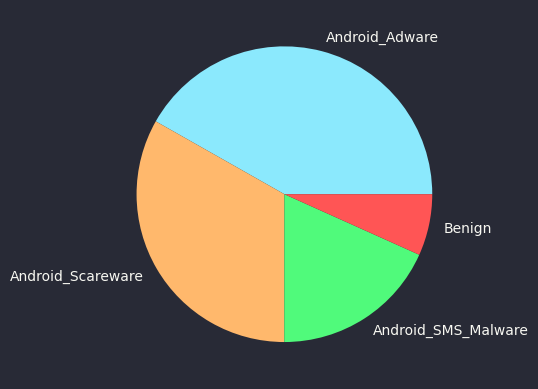

In [12]:
data["Label"].value_counts().plot(kind="pie")
pyplot.ylabel("")
pyplot.show()

### C.5 - Profiler

In [16]:
ProfileReport(df=data.sample(n=500), minimal=True, correlations={"auto": {"calculate": False}}, title="Android Malware Profiling Report")\
    .to_file(str(TEMP_FOLDER / "android_malware_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### C.6 Save to disk
We can finally save the processed dataset to the disk.

In [15]:
data.to_csv((DATA_FOLDER / "Android_Malware_cleaned.csv"), sep=",", index=False, mode="w")

## D - Conclusion of the data analysis
In the next notebook, we will discuss data validation and how to use Great Expectation to ensure a good data quality for our trainings.